# **Predicting Flight Prices**

## **Introduction**
Airline ticket pricing is influenced by multiple factors, including seasonality, booking time, carrier policies, and demand fluctuations. Understanding these dynamics and predicting flight prices accurately can empower travelers to make cost-effective decisions. This research aims to leverage machine learning techniques to analyze flight pricing data and build predictive models that forecast ticket prices with high accuracy.

## **Goal**
The primary objective of this study is to develop machine learning models that effectively predict flight prices based on historical pricing data and relevant features. By comparing multiple ML algorithms, this project seeks to identify the most accurate model for price prediction and provide insights into the factors driving airline ticket costs.

## **Project Scope**
This research focuses on:
- Gathering and analyzing flight pricing data from multiple sources.
- Applying data preprocessing techniques to clean and structure the dataset.
- Implementing and evaluating various machine learning models, including regression and ensemble methods.
- Assessing the performance of models using appropriate evaluation metrics.
- Providing insights into key features that impact flight pricing.

## **About the Data** 
The dataset used in this research consists of flight pricing data collected from kaggle. It includes key variables such as:
- **Airline Name** (Categorical)
- **Departure and Arrival Cities** (Categorical)
- **Additional Info** (Categorical)
- **Routes** (Categorical)
- **Travel Date** (Date-based feature)
- **Arrival Date** (Date-based feature)
- **Duration** (Time-based feature)
- **Number of Stops** (Numeric)
- **Price** (Numerical target variable)

Data preprocessing techniques such as handling missing values, feature engineering, and normalization will be applied to prepare the dataset for model training.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# ! pip install openpyxl

train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Test_set.xlsx")


## Descriptiven Analysis

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
print("Train set", train.shape, "Test set", test.shape)

Train set (10683, 11) Test set (2671, 10)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [10]:
train.loc[train.Route.isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Looks the one missing `Total_Stops` is also the one missing `Route`, that would make sense as these 2 features are highly related. To solve this issue we'll try to find rows with "Delhi" as their `Source` and "Cochin" as `Destination`

In [11]:
train.loc[(train.Source == "Delhi") & (train.Destination == "Cochin")]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
16,SpiceJet,15/04/2019,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No info,5830
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794


In [12]:
# Based on the data above I would say our flight had 2 stops and we'll just select any route with 2 stops among the data

train.Route.fillna("DEL → AMD → BOM → COK", inplace=True)
train.Total_Stops.fillna("2 stops", inplace=True)

train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## Data cleaning

In [14]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'], format="%d/%m/%Y")
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'], format="%d/%m/%Y")

train["Dep_Time"] = pd.to_datetime(train["Dep_Time"], format="%H:%M")
test["Dep_Time"] = pd.to_datetime(test["Dep_Time"], format="%H:%M")


In [15]:
# Convert Total_Stops to numeric values
get_stops = lambda x: 0 if len(str(x).split()) == 1 else int(str(x).split()[0])

train['Total_Stops'] = train.Total_Stops.apply(get_stops)
test['Total_Stops'] = test.Total_Stops.apply(get_stops)

In [16]:
# Conver Duration to hours (float)
def convert_hours(x):
    vals = str(x).split()
    hours = 0
    for val in vals:

        hours += int(val.strip("h")) if "h" in val else int(val.strip("m"))/60
    return hours

train['Duration'] = train.Duration.apply(convert_hours)

train.Duration.head()

0     2.833333
1     7.416667
2    19.000000
3     5.416667
4     4.750000
Name: Duration, dtype: float64

In [17]:
test["Duration"] = test.Duration.apply(convert_hours)

test.Duration.head()

0    10.916667
1     4.000000
2    23.750000
3    13.000000
4     2.833333
Name: Duration, dtype: float64

In [18]:
# Extract month and day from the date features

train["Day"] = train.Date_of_Journey.dt.day
train['Month'] = train.Date_of_Journey.dt.month

# test set
test["Day"] = test.Date_of_Journey.dt.day
test['Month'] = test.Date_of_Journey.dt.month

In [19]:
# morning
# afternoon
# evening
# night

def get_time_period(x):
    if 0 <= x < 6:
        return "Mid-Night"
    elif x < 12:
        return "Morning"
    elif x < 17:
        return "Afternoon"
    elif 17 <= x < 20:
        return "Evening"
    else:
        return "Night"

train["Depatures"] = train.Dep_Time.dt.hour.apply(get_time_period)
test["Depatures"] = test.Dep_Time.dt.hour.apply(get_time_period)


In [20]:
train.Depatures.head()

0        Night
1    Mid-Night
2      Morning
3      Evening
4    Afternoon
Name: Depatures, dtype: object

In [21]:
info = train.Additional_Info.value_counts().reset_index()
info

,index,Additional_Info
0,No info,8345
1,In-flight meal not included,1982
2,No check-in baggage included,320
3,1 Long layover,19
4,Change airports,7
5,Business class,4
6,No Info,3
7,1 Short layover,1
8,Red-eye flight,1
9,2 Long layover,1


In [22]:
plt.style.use("ggplot")
# plt.style.available

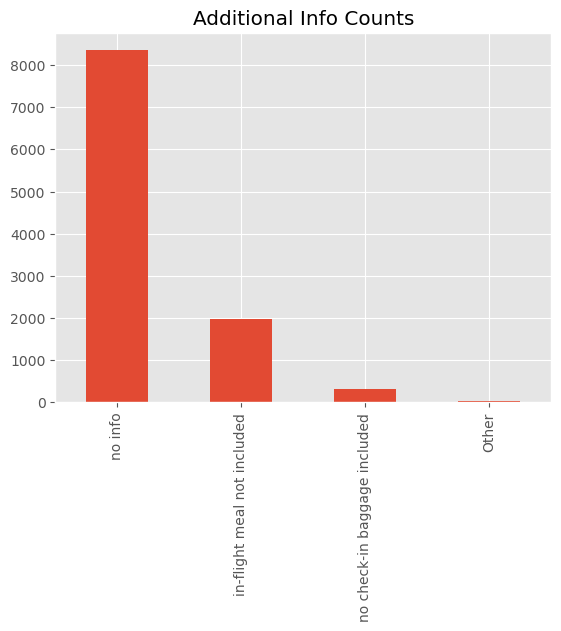

In [23]:
# "No info" should be the same as "No Info"

# correct the spelling issue
train["Additional_Info"] = train.Additional_Info.str.lower()

# get the counts of each unique value
info = train.Additional_Info.value_counts()
# get counts less than 100
rare_info = info[info < 100].index.to_list()


train["Additional_Info"] = train.Additional_Info.apply(lambda x: "Other" if x in rare_info else x)

train.Additional_Info.value_counts().plot(kind="bar", title="Additional Info Counts")
plt.show()

In [86]:
# Test set
info = test.Additional_Info.value_counts()


test['Additional_Info'] = test.Additional_Info.str.lower()

test['Additional_Info'] = test.Additional_Info.apply(lambda x: "Other" if x in rare_info else x)

test.Additional_Info.unique()

array(['no info', 'in-flight meal not included',
       'no check-in baggage included', 'Other'], dtype=object)

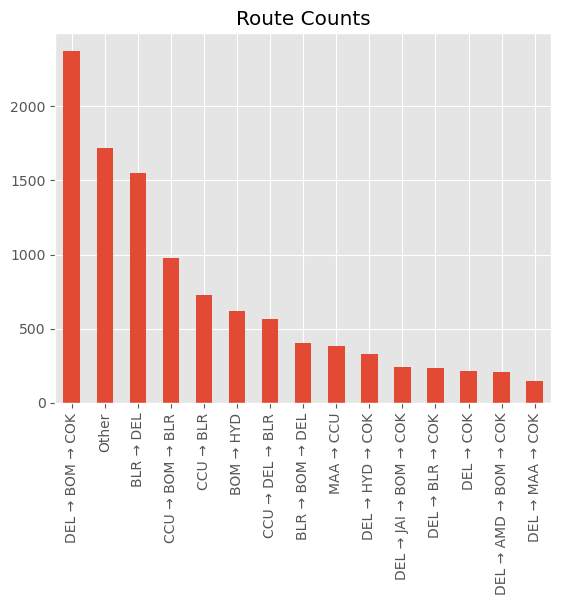

In [25]:
routes = train.Route.value_counts()

rare_routes = routes[routes < 100].index.to_list()

train["Route"] = train.Route.apply(lambda x: "Other" if x in rare_routes else x)

train.Route.value_counts().plot(kind="bar", title="Route Counts")
plt.show()

In [26]:
unique_routes = routes[routes >= 100].index.to_list()

test["Route"] = test.Route.apply(lambda x: "Other" if x not in unique_routes else x)

In [27]:
train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Depatures
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2.833333,0,no info,3897,24,3,Night
1,Air India,2019-05-01,Kolkata,Banglore,Other,1900-01-01 05:50:00,13:15,7.416667,2,no info,7662,1,5,Mid-Night
2,Jet Airways,2019-06-09,Delhi,Cochin,Other,1900-01-01 09:25:00,04:25 10 Jun,19.000000,2,no info,13882,9,6,Morning


In [28]:
train.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  float64       
 8   Total_Stops      10683 non-null  int64         
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Day              10683 non-null  int64         
 12  Month            10683 non-null  int64         
 13  Depatures        10683 non-null  object        
dtypes: datetime64[ns](2), float64(1), int6

# EDA

### Questions
- Does airline influence price?
- Is the number of stops a price determiner
- Does route influence price
- Does longer duration lead to higher price
- Does seasonality affect pricing

In [29]:
airline_counts = train.Airline.value_counts().reset_index()
test_airline_counts = test.Airline.value_counts().reset_index()

airline_counts

,index,Airline
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1752
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


In [30]:
test_airline_counts

,index,Airline
0,Jet Airways,897
1,IndiGo,511
2,Air India,440
3,Multiple carriers,347
4,SpiceJet,208
5,Vistara,129
6,Air Asia,86
7,GoAir,46
8,Multiple carriers Premium economy,3
9,Vistara Premium economy,2


In [31]:
# since "Trujet" airline only appear in the training data once let's just drop it
index = train[train.Airline == "Trujet"].index

train.drop(index, inplace=True)

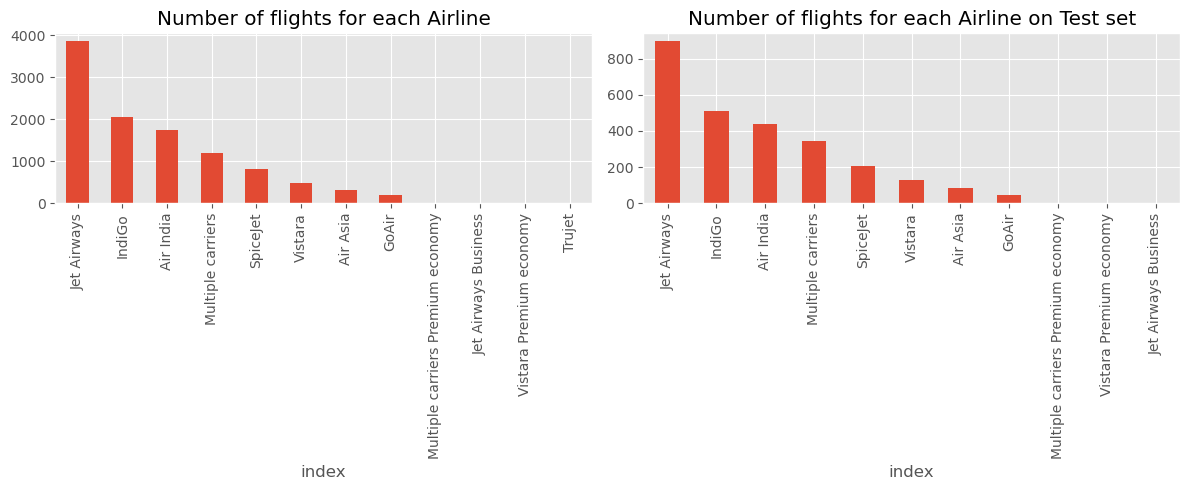

In [32]:
plt.figure(figsize=(12, 5))

ax = plt.subplot(1, 2, 1)
airline_counts.plot(kind="bar", x="index", y="Airline", legend=False, ax=ax)
ax.set_title("Number of flights for each Airline")

ax = plt.subplot(1, 2, 2)
test_airline_counts.plot(kind="bar", x="index", y="Airline", legend=False, ax=ax)
ax.set_title("Number of flights for each Airline on Test set")

plt.tight_layout()
plt.show()

In [33]:
airline_prices = train.groupby("Airline").Price.agg(["mean", "median", len]).sort_values(by="len").reset_index()

airline_prices


,Airline,mean,median,len
0,Vistara Premium economy,8962.333333,9125.0,3
1,Jet Airways Business,58358.666667,54747.0,6
2,Multiple carriers Premium economy,11418.846154,11269.0,13
3,GoAir,5861.056701,5135.0,194
4,Air Asia,5590.260188,5162.0,319
5,Vistara,7796.348643,7980.0,479
6,SpiceJet,4338.284841,3873.0,818
7,Multiple carriers,10902.678094,10197.0,1196
8,Air India,9611.210616,9443.0,1752
9,IndiGo,5673.682903,5000.0,2053


In [34]:
airline_prices['average_per_person'] = airline_prices["mean"] / airline_prices.len
# a lower value for this feature means that

In [35]:

fig = px.bar(airline_prices, x="Airline", y=["average_per_person", "median", "mean"], barmode="group", title="Airline Prices")
fig.show()

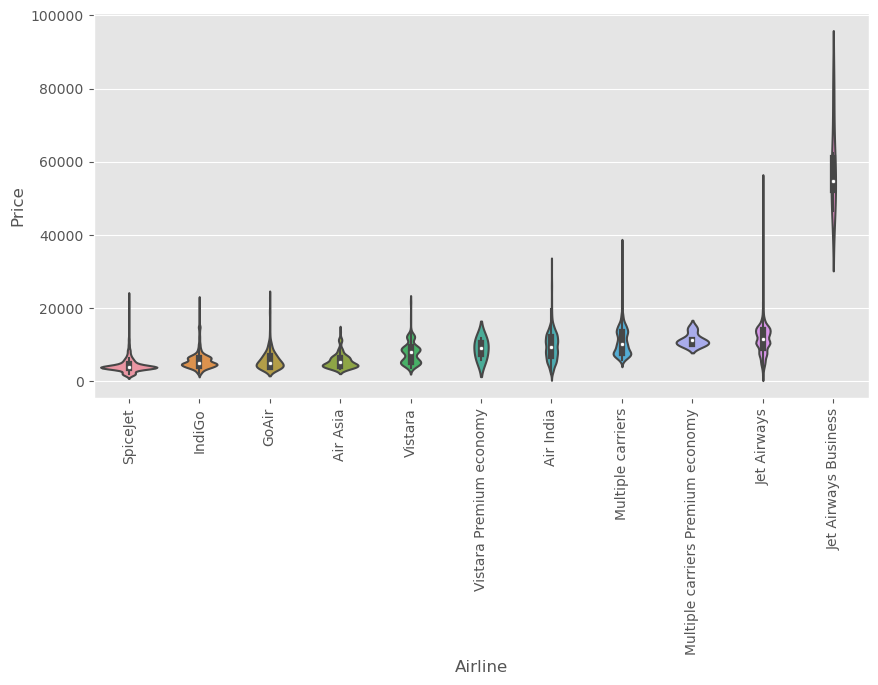

In [36]:
order = airline_prices.sort_values(by="median", ascending=True).Airline

plt.figure(figsize=(10, 5))
sns.violinplot(train, x="Airline", y="Price", order=order)
plt.xticks(rotation=90)
plt.show()

In [37]:
fig = px.histogram(train.Price)
fig.show()

In [38]:
index = train[train.Price > 70000].index

train.drop(index, inplace=True)

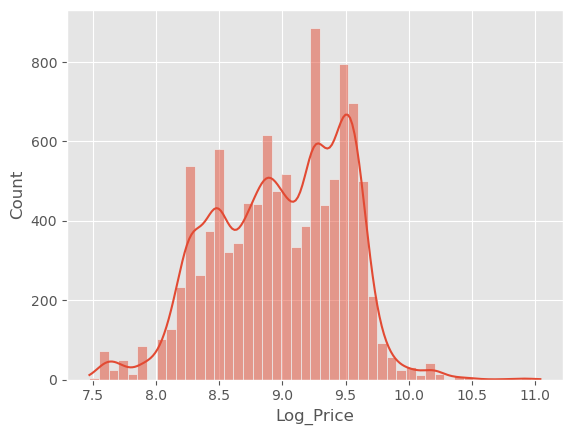

In [39]:
train["Log_Price"] = train.Price.apply(np.log)

sns.histplot(train.Log_Price, kde=True)
plt.show()

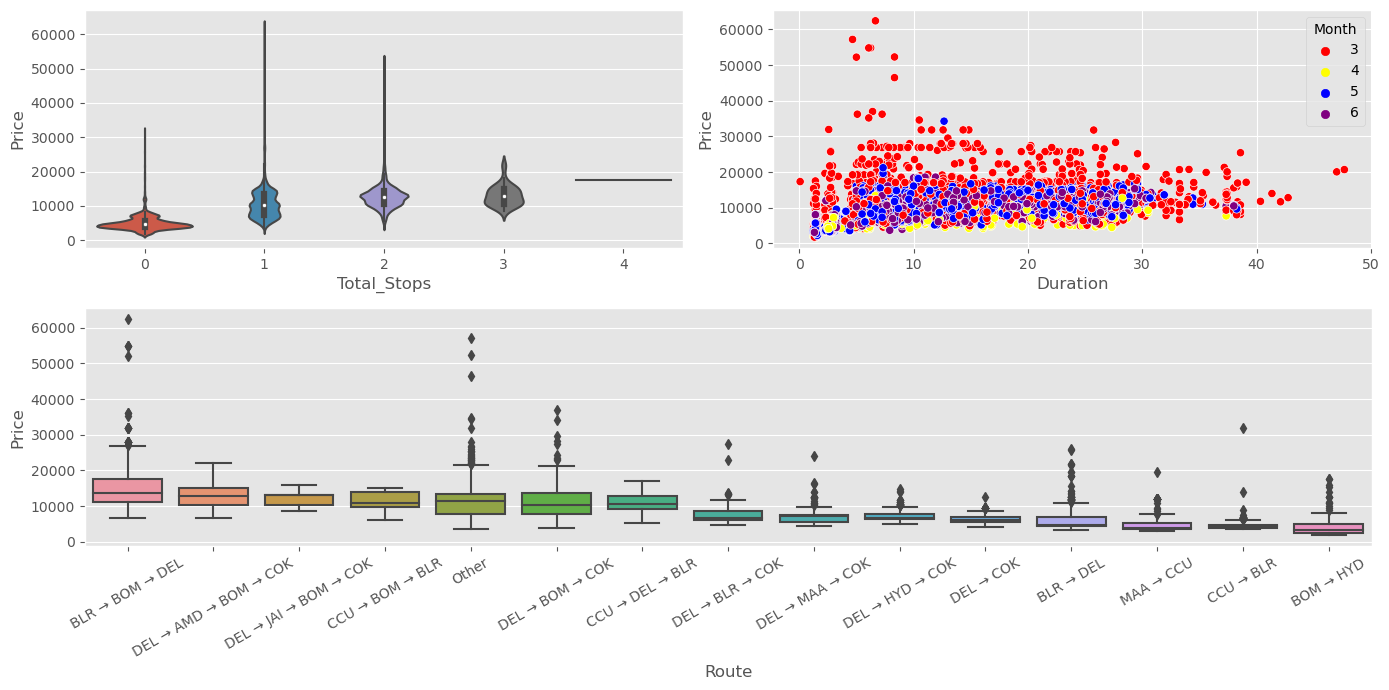

In [40]:
# is number of stops a price determiner?

plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.violinplot(data=train, x="Total_Stops", y="Price")

plt.subplot(2, 2, 2)
sns.scatterplot(train, x="Duration", y="Price", hue="Month", palette={3: "red", 4: "yellow", 5: "blue", 6: "purple"})

order = train.groupby("Route").Price.mean().sort_values(ascending=False).index

plt.subplot(2, 1, 2)
sns.boxplot(train, x="Route", y="Price", order=order)
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

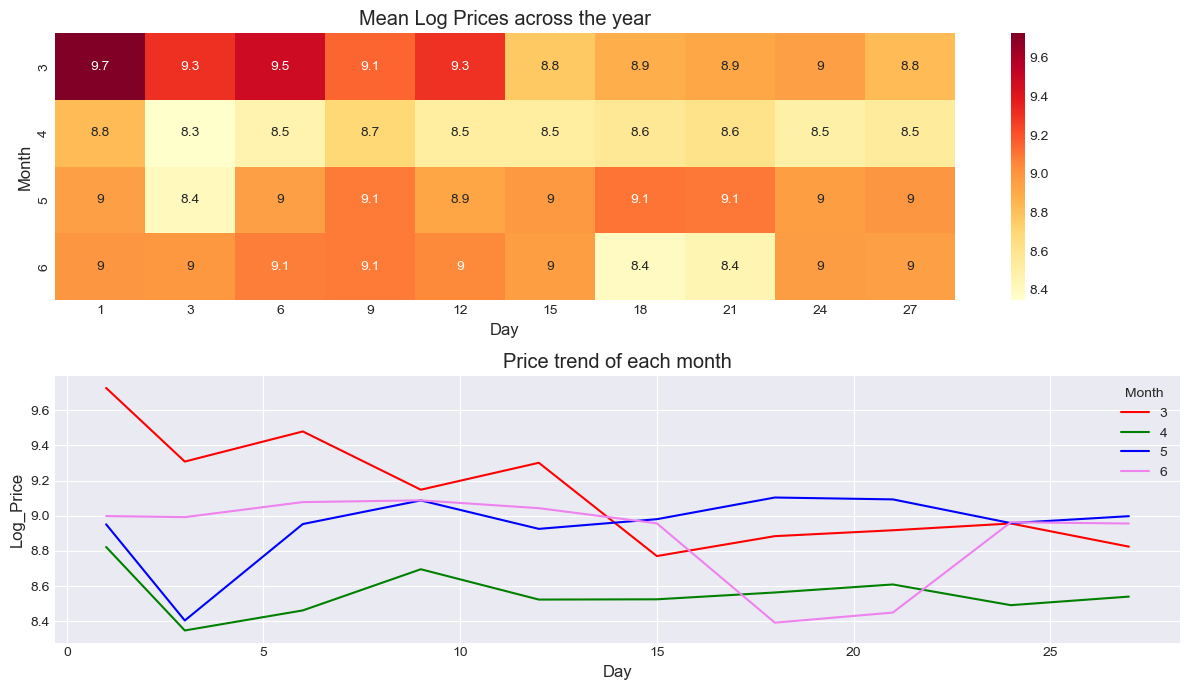

In [89]:
price_trend = train.groupby(["Month", "Day"]).Log_Price.mean().reset_index()

heat_map = price_trend.sort_values(by=['Month', "Day"]).pivot(index="Month", columns="Day", values="Log_Price")

plt.figure(figsize=(12, 7))
plt.subplot(211)
sns.heatmap(data=heat_map, annot=True, cmap="YlOrRd")
plt.title("Mean Log Prices across the year")


plt.subplot(212)
palette = {3: "red", 4: "green", 5: "blue", 6: "violet"}
sns.lineplot(price_trend, x="Day", y="Log_Price", hue="Month", palette=palette)
plt.title("Price trend of each month")

plt.tight_layout()

plt.show()

In [42]:
source = train.groupby("Source")[["Log_Price", "Price"]].mean().sort_values(by="Price", ascending=False)
source


,Log_Price,Price
Source,,
Delhi,9.199545,10539.439057
Kolkata,9.025745,9158.389411
Banglore,8.821881,7984.907559
Mumbai,8.311703,5061.030172
Chennai,8.405177,4789.892388


In [43]:
destination = (
    train.groupby("Destination")[["Log_Price", "Price"]]
    .mean()
    .sort_values(by="Price", ascending=False)
)

destination

,Log_Price,Price
Destination,,
New Delhi,9.240946,11845.112782
Cochin,9.199545,10539.439057
Banglore,9.025745,9158.389411
Delhi,8.513463,5143.918577
Hyderabad,8.311703,5061.030172
Kolkata,8.405177,4789.892388


In [44]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Depatures', 'Log_Price'],
      dtype='object')

## Model Training

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

experimental = ["Source", "Destination", "Route"]
drop_cols = ["Date_of_Journey", "Arrival_Time", "Dep_Time"]

targets = [ "Price", "Log_Price"]

X = train.drop(columns=drop_cols+targets)


y = train[targets[0]]

y_log = train[targets[1]]

In [46]:
X.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Depatures
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,0,no info,24,3,Night
1,Air India,Kolkata,Banglore,Other,7.416667,2,no info,1,5,Mid-Night
2,Jet Airways,Delhi,Cochin,Other,19.000000,2,no info,9,6,Morning
3,IndiGo,Kolkata,Banglore,Other,5.416667,1,no info,12,5,Evening
4,IndiGo,Banglore,New Delhi,Other,4.750000,1,no info,1,3,Afternoon


In [47]:
plt.style.use("seaborn-darkgrid")
# plt.style.available

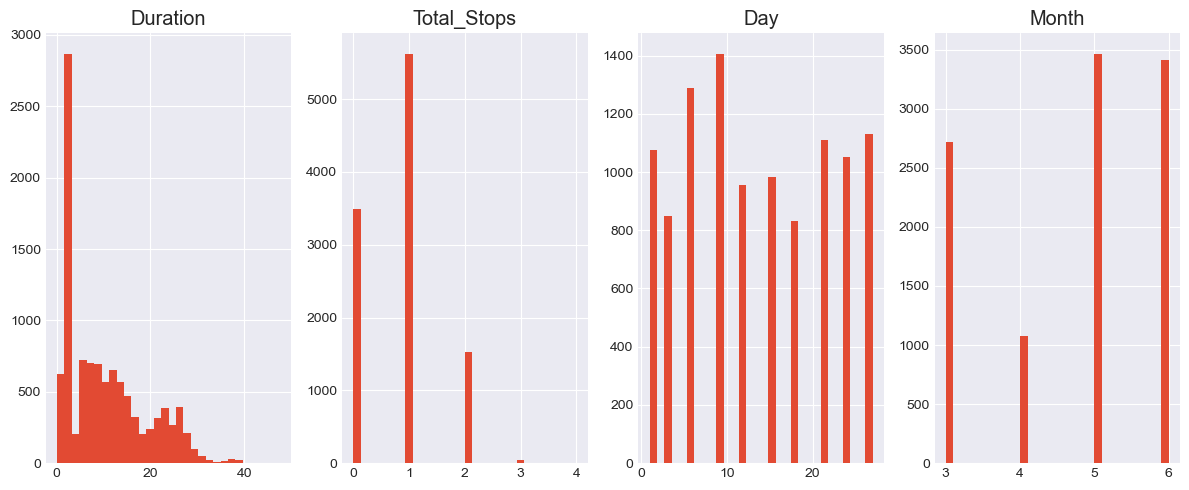

In [48]:
X1 = X.copy()

num_data = X1.select_dtypes(include="number")

plt.figure(figsize=(12, 5))
for i, col in enumerate(num_data, start=1):
    plt.subplot(1, num_data.shape[1], i)
    plt.hist(num_data[col], bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

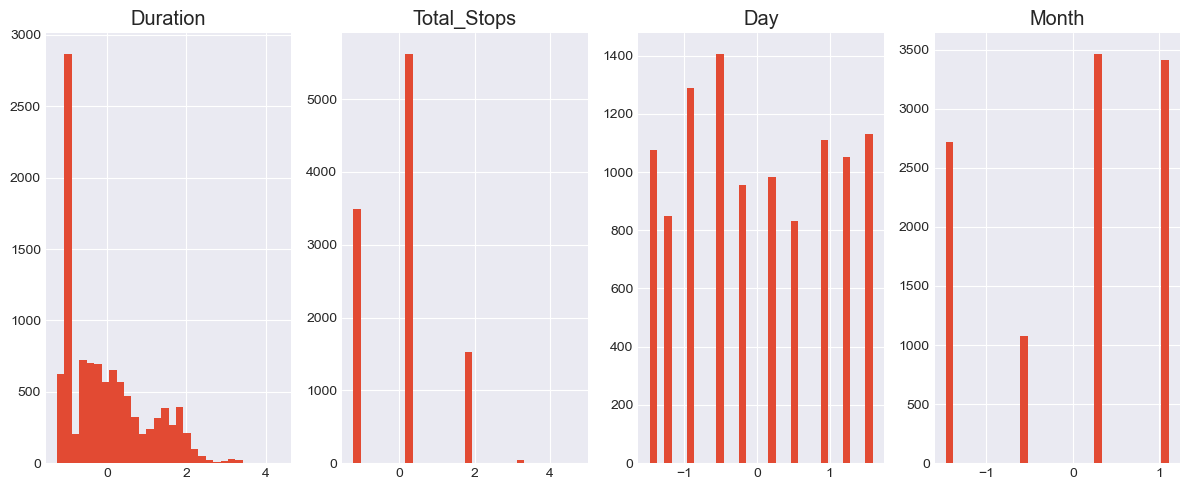

In [49]:
# Normalizing numerical features
scaler = StandardScaler()

scaled = scaler.fit_transform(num_data)

X1[num_data.columns] = scaled

plt.figure(figsize=(12, 5))
for i, col in enumerate(num_data, start=1):
    plt.subplot(1, num_data.shape[1], i)
    plt.hist(X1[col], bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [50]:
# Binary encoding for categorical variables
cat_data = X1.select_dtypes(include="object")

label_encode = [col for col in cat_data if cat_data[col].nunique() > 6] + ["Additional_Info"]

encoder = LabelEncoder()

for col in label_encode:
    cat_data[col] = encoder.fit_transform(cat_data[col])

cat_data

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Airline,Source,Destination,Route,Additional_Info,Depatures
0,3,Banglore,New Delhi,1,3,Night
1,1,Kolkata,Banglore,14,3,Mid-Night
2,4,Delhi,Cochin,14,3,Morning
3,3,Kolkata,Banglore,14,3,Evening
4,3,Banglore,New Delhi,14,3,Afternoon
...,...,...,...,...,...,...
10678,0,Kolkata,Banglore,3,3,Evening
10679,1,Kolkata,Banglore,3,3,Night
10680,4,Banglore,Delhi,1,3,Morning
10681,9,Banglore,New Delhi,1,3,Morning


In [51]:
binary_cols = cat_data.select_dtypes(include="object")

bin_encoder = BinaryEncoder(cols=binary_cols.columns)

encoded = bin_encoder.fit_transform(cat_data)

X1 = X1.drop(columns=cat_data.columns).join(encoded, how="left")

In [52]:
Xtrain, Xtest, ytrain, ytest = tts(X1, y_log, test_size=.2, random_state=42)

Xtrain.head()

,Duration,Total_Stops,Day,Month,Airline,Source_0,Source_1,Source_2,Destination_0,Destination_1,Destination_2,Route,Additional_Info,Depatures_0,Depatures_1,Depatures_2
10611,-1.099053,-1.220558,0.529545,0.250029,4,1,0,1,1,1,0,2,1,0,1,1
1034,-0.518183,0.260221,1.237218,-0.608947,8,0,1,1,0,1,1,12,3,1,0,1
8124,-0.931683,-1.220558,1.591054,-1.467923,3,0,1,0,0,1,0,3,3,0,1,0
4781,0.161140,0.260221,-1.239636,-1.467923,6,0,1,1,0,1,1,8,3,0,1,1
3209,-0.252361,0.260221,-0.885800,-1.467923,3,0,1,1,0,1,1,10,3,0,1,1


In [53]:
model_dict = {}

# decision tree
model_dict["decision_tree"] = DecisionTreeRegressor()
model_dict["decision_tree"].fit(Xtrain, ytrain)
# Random Forest
model_dict["forest"] = RandomForestRegressor()
model_dict["forest"].fit(Xtrain, ytrain)
# Linear Regression
model_dict["linear"] = LinearRegression()
model_dict["linear"].fit(Xtrain, ytrain)
# SVM
model_dict["svm"] = SVR()
model_dict["svm"].fit(Xtrain, ytrain)
# XGBoost
model_dict["xgboost"] = XGBRegressor()
model_dict["xgboost"].fit(Xtrain, ytrain)
# Gradient Boost
model_dict["gradient_boost"] = GradientBoostingRegressor()
model_dict["gradient_boost"].fit(Xtrain, ytrain)

GradientBoostingRegressor()

In [54]:
scores = []

for score in model_dict:
    score_ = model_dict[score].score(Xtest, ytest)
    scores.append(score_)


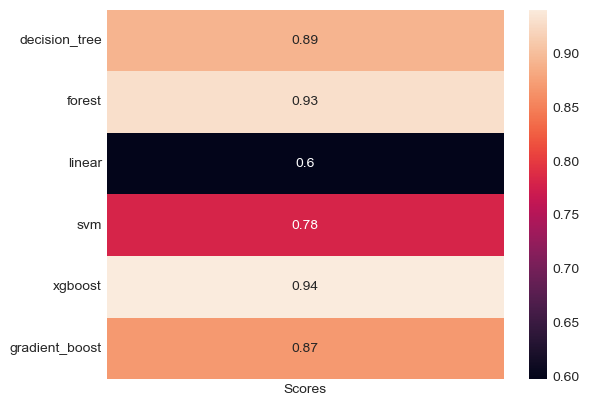

In [55]:

scores_frame = pd.DataFrame({"Scores": scores}, index=list(model_dict.keys()))
sns.heatmap(scores_frame, annot=True)
plt.show()

Looks like tree models are very good at picking up the data patterns

### Bagging

In [56]:
# decision tree
base_model = DecisionTreeRegressor(max_depth=5)

bag_tree = BaggingRegressor(base_model, n_estimators=150, random_state=42)

bag_tree.fit(Xtrain, ytrain)

tree_score = bag_tree.score(Xtest, ytest)
tree_score


0.7994951659716868

In [57]:
# linear regression
base_model = LinearRegression()

bag_linear = BaggingRegressor(base_model, n_estimators=200, random_state=42)

bag_linear.fit(Xtrain, ytrain)

bag_linear.score(Xtest, ytest) # not so well

0.5966895437628876

XGBoost Native api

In [58]:
params = {"objective":"reg:squarederror", "eval_metric":"rmse"}

dtrain = xgb.DMatrix(Xtrain, label=ytrain, enable_categorical=True)
dtest = xgb.DMatrix(Xtest, label=ytest, enable_categorical=True)

evals = [(dtrain, "train"), (dtest, "validation")]

model = xgb.train(params=params, dtrain=dtrain, num_boost_round=1000, early_stopping_rounds=50, evals=evals, verbose_eval=50)

# Have to train XGBoost explicitly using its native api then convert to sklearn api and use it in stacking

[0]	train-rmse:5.95434	validation-rmse:5.98235
[50]	train-rmse:0.11107	validation-rmse:0.13448
[100]	train-rmse:0.09123	validation-rmse:0.12719
[150]	train-rmse:0.07943	validation-rmse:0.12604
[200]	train-rmse:0.07268	validation-rmse:0.12552
[250]	train-rmse:0.06791	validation-rmse:0.12618
[254]	train-rmse:0.06752	validation-rmse:0.12634


stacking strong models; _xgboost_, _svm_, _random forest_, _gradient boost_

In [59]:
preds = model.predict(dtest)

r2_score(ytest, preds)

0.9412900899215156

#### XGBoost Hyperparameter tuning

In [60]:
estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
scores = []

for estimator in estimators:
    model = XGBRegressor(n_estimators=estimator)
    model.fit(Xtrain, ytrain)
    score = model.score(Xtest, ytest)
    scores.append(score)

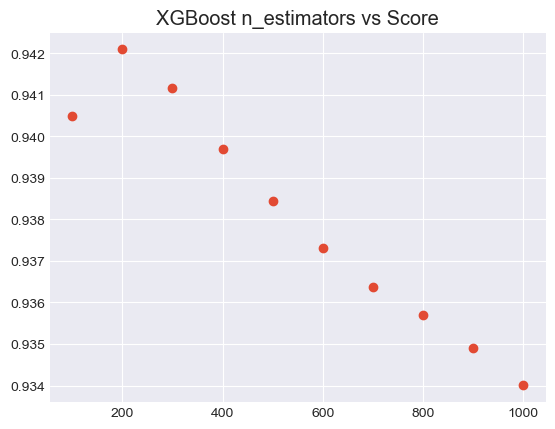

In [61]:
plt.plot(estimators, scores, "o")
plt.title("XGBoost n_estimators vs Score")
plt.show()

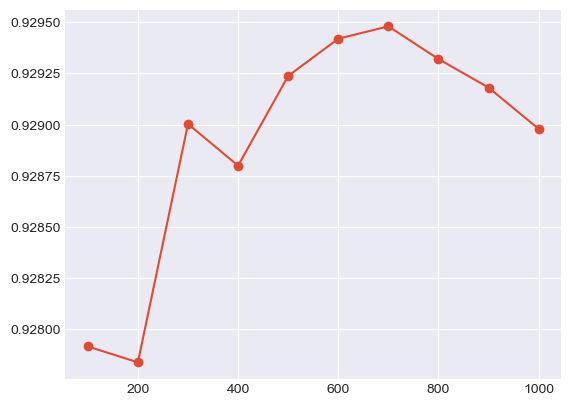

In [62]:
estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
scores = []

for estimator in estimators:
    model = RandomForestRegressor(n_estimators=estimator)
    model.fit(Xtrain, ytrain)
    score = model.score(Xtest, ytest)
    scores.append(score)

plt.plot(estimators, scores, "o-")
plt.show()

In [63]:
base_estimators = {}

base_estimators["forest"] = RandomForestRegressor(max_depth=5, n_estimators=200, random_state=7)
base_estimators["gradient_boost"] = GradientBoostingRegressor(n_estimators=200, max_depth=5)
base_estimators["svm"] = SVR()

final_estimator = XGBRegressor(n_estimators=200, eta=0.1, max_depth=8, alpha=2)

In [64]:
stack = StackingRegressor(estimators=base_estimators.items(), final_estimator=final_estimator, cv=5, passthrough=True)

stack.fit(Xtrain, ytrain)

prediction = stack.predict(Xtest)

In [65]:
r2_score(ytest, prediction)


0.9364038234797325

In [66]:
params = {
    "eta":[0.1, 0.15, 0.2],
    "max_depth": [6, 8, 10],
    "alpha": [1, 2]
          }

model = XGBRegressor(n_estimators=200)

grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring="neg_mean_squared_error", verbose=1)

grid.fit(Xtrain, ytrain)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=200,
       

In [67]:
grid.best_score_*-1, grid.best_params_

(0.017146308052114548, {'alpha': 1, 'eta': 0.15, 'max_depth': 10})

In [68]:
model = XGBRegressor(n_estimators=200, max_depth=10, eta=0.1, alpha=1)


In [69]:

scores = cvs(model, X1, y, cv=5, scoring="neg_mean_squared_error")

np.mean(scores) * -1

2711854.9215250653

In [70]:
model.fit(Xtrain, ytrain)

# convert to actual price
pred = np.exp(model.predict(Xtest))

r2_score(y.loc[ytest.index], pred.astype(int))

0.8700117660736425

In [71]:
pred.astype(int)

array([10828,  8619,  6602, ...,  6286, 14643, 17609])

## Prepare for Production

In [72]:
# unfortuantely LabelEncoder thorws an error when passed into a pipeline so for simplicity we'll use ordianl encoder
from sklearn.preprocessing import OrdinalEncoder


processor = ColumnTransformer(transformers=[
    ("Standard Scaler", scaler, num_data.columns.to_list()),
    ("Ordinal Encoder", OrdinalEncoder(), label_encode),
    ])

my_pipeline = Pipeline(
    steps=[
        ("Binary Encoder", bin_encoder),
        ("Processor", processor),
        ("Model", grid.best_estimator_),
    ]
)

In [73]:
X_train, X_test, y_train, y_test = tts(X, y_log, test_size=0.2, random_state=45)

my_pipeline.fit(X_train, y_train)

my_pipeline.score(X_test, y_test)

0.9257504578490289

In [74]:
import joblib

joblib.dump(my_pipeline, "flight_model.joblib")

['flight_model.joblib']

In [81]:
test.drop(columns=drop_cols, inplace=True)

In [82]:
X.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Day', 'Month', 'Depatures'],
      dtype='object')

In [84]:
test.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Day', 'Month', 'Depatures'],
      dtype='object')

In [87]:
model = joblib.load("flight_model.joblib")

preds = np.exp(model.predict(test))

preds.astype(int)

array([13916,  4557, 12670, ..., 17622, 14447,  7943])